# Popular Data Science Questions
## Stack Exchange
Chosen Site: __[Data Science](https://datascience.stackexchange.com)__
Questions:
* What kind of questions are welcome on this site?
    * It seems the kind of questions that are welcome are anything having to do with data science as a whole, with most questions involving machine learning in some form or another
* What, other than questions, does this site's home subdivide into?
    * Tags, Users, Companies, Unanswered
    * Do any of them look useful towards our goal?
        * Unanswered and Tags would be useful
* What information is available in each post?
    * Ask date, Modification Date, Times Viewed, Text of the question, Up/Down Votes, Tags, Comments, User, Time Since Asked

## Stack Exchange Data Explorer
Upon cursory examination, tags looks like it may be useful for a rough overview of interest in a given topic, but the posts table contains much more information and, most importantly, date information, so we can determine whether interest in a given topic is recent or not.

## Getting the Data
There are a lot of columns in the posts table, so we will narrow our field down to the following relevant columns:
* `Id`: An identification number for the post
* `PostTypeId`: An identification number for the type of post
* `CreationDate`: The date and time of creation of the post
* `Score`: The post's score
* `ViewCount`: How many times the post was viewed
* `Tags`: What tags were used
* `AnswerCount`: How many answers the question got (only applicable to question posts)
* `FavoriteCount`: How many times the question was favorited (only applicable to question posts

To figure out which type of posts are relevant, let's see how many of each there are:
```
SELECT PostTypeId, COUNT(*) as NrOfPosts
  FROM posts
 GROUP BY PostTypeId;
```
<table>
  <tr>
    <th>PostTypeId</th>
    <th>NrOfPosts</th>
  </tr>
  <tr>
    <td>1</td>
    <td>21446</td>
  </tr>
  <tr>
    <td>2</td>
    <td>23673</td>
  </tr>
  <tr>
    <td>4</td>
    <td>234</td>
  </tr>
  <tr>
    <td>5</td>
    <td>234</td>
  </tr>
  <tr>
    <td>6</td>
    <td>11</td>
  </tr>
  <tr>
    <td>7</td>
    <td>1</td>
  </tr>
</table>

It is apparent that any type of post outside of questions and answers has too low of a volume to be consequential for us.

To get the data for recent posts (only in 2019), we make the following query:
```
SELECT Id, PostTypeId,
       CreationDate, Score,
       ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;
 ```
 
Below is an example of a row:
<table>
  <tr>
    <th>Id</th>
    <th>PostTypeId</th>
    <th>CreationDate</th>
    <th>Score</th>
    <th>ViewCount</th>
    <th>Tags</th>
    <th>AnswerCount</th>
    <th>FavoriteCount</th>
  </tr>
  <tr>
   <td>61407</td>
   <td>1</td>
   <td>2019-10-08 03:39:49</td>
   <td>6</td>
   <td>942</td>
   <td>&lt;machine-learning&gt;&lt;time-series&gt;&lt;clustering&gt;&lt;k-means&gt;unsupervised-learning</td>
   <td></td>
   <td></td>
  </tr>
</table>

## Exploring the Data

Below we will read in the data, which is stored into a file called `2019_questions.csv`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

To further explore the data, we will use `questions.info()` to answer the following:
* How many missing values in each column?
* Can we fix the missing values somehow?
* Are the types of each column adequate?
* What can we do about the `Tags` column?

In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


As for missing values, there only seem to be any in the `FavoriteCount` column, which is missing 7,432 values, which is most of the values.

We can fix this, as a missing value under `FavoriteCount` implies there were no favorites, so we could replace the null values with zeroes.

The types of each column are perfectly fine for their uses, although once we fill in the zeroes in `FavoriteCount` we can change it to `int64`.

The `Tags` column is currently populated with list objects which we will leave in tact.

## Cleaning the Data
Below we will fill the null values of the `FavoriteCount` column with zeroes:

In [4]:
questions["FavoriteCount"] = questions["FavoriteCount"].fillna(0)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)

In [5]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


As we can see by all columns now containing the same number of values, this was successful.

Next we will clean the `Tags` column:

In [6]:
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")
questions.sample(5)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
4103,48454,2019-04-02 15:52:37,1,11,"[python, correlation, sentiment-analysis]",0,0
8687,55665,2019-07-15 02:35:45,0,12,[automatic-summarization],0,0
120,44607,2019-01-26 10:30:50,0,167,"[reinforcement-learning, ai, openai-gym]",2,0
3638,49109,2019-04-11 09:30:05,1,989,"[keras, lstm, loss-function, accuracy]",2,0
367,44990,2019-02-03 11:42:30,1,19,"[machine-learning, deep-learning, statistics]",1,0


## Most Used and Most Viewed
We will split the "most popular tag" concept into two categories, most-used and most-viewed.

In [7]:
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [8]:
print(tag_count)

{'dimensionality-reduction': 69, 'glm': 3, 'azure-ml': 12, 'pattern-recognition': 1, 'scalability': 4, 'kaggle': 43, 'processing': 5, 'dropout': 15, 'bigdata': 95, 'methodology': 10, 'similar-documents': 20, 'stanford-nlp': 9, 'hyperparameter-tuning': 59, 'question-answering': 4, 'matrix': 22, 'named-entity-recognition': 36, 'neural-network': 1055, 'historgram': 7, 'genetic-programming': 2, 'encoding': 54, '.net': 1, 'google': 17, 'bert': 64, 'mse': 8, 'amazon-ml': 1, 'mnist': 23, 'crawling': 3, 'doc2vec': 3, 'self-driving': 3, 'language-model': 25, 'neural-style-transfer': 8, 'kernel': 27, 'unseen-data': 1, 'dummy-variables': 19, 'image': 32, 'torch': 4, 'automl': 2, 'scala': 9, 'automatic-summarization': 10, 'multi-output': 7, 'simulation': 11, 'annotation': 12, 'mcmc': 4, 'dplyr': 6, 'scipy': 40, 'pipelines': 17, 'manhattan': 3, 'open-set': 2, 'transformer': 45, 'probability': 76, 'tokenization': 6, 'ocr': 26, 'community': 1, 'data-transfer': 1, 'seaborn': 38, 'redshift': 1, 'discri

To make the above easier to work with, we will transform it into a dataframe.

In [9]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(5)

,Count
dimensionality-reduction,69
glm,3
azure-ml,12
pattern-recognition,1
scalability,4


That looks better, but we want the highest number up on top.

In [10]:
tag_count = tag_count.sort_values(by="Count")
tag_count.tail(5)

,Count
keras,935
neural-network,1055
deep-learning,1220
python,1814
machine-learning,2693


For our purposes, we will use the top ten tags for visualization.

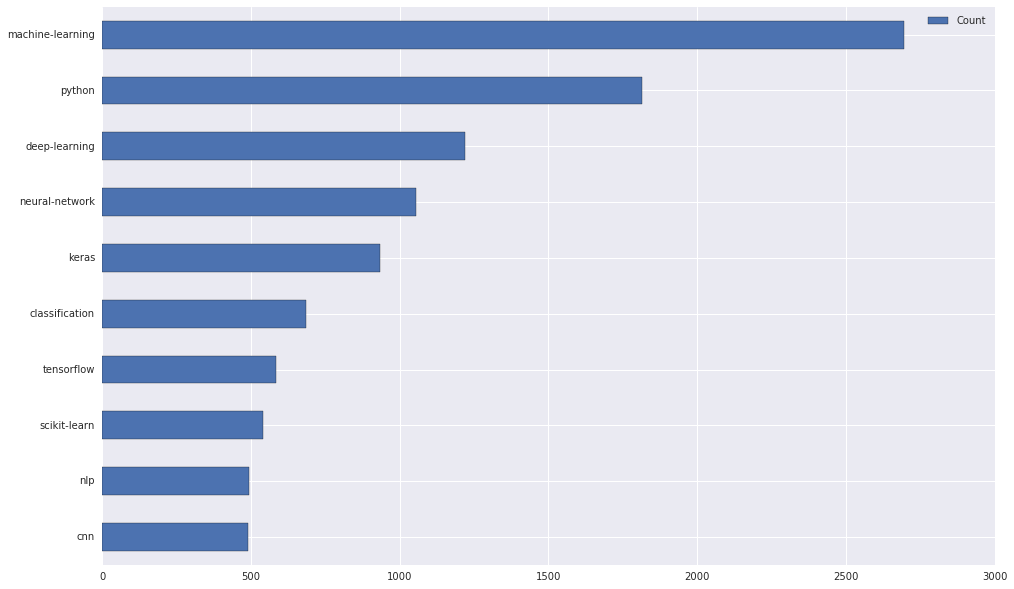

In [11]:
most_used = tag_count.tail(10)
most_used.plot(kind="barh", figsize=(16,10))

In [12]:
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row["Tags"]:
        if tag in tag_view_count:
            tag_view_count[tag] += row["ViewCount"]
        else:
            tag_view_count[tag] = row["ViewCount"]

tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(10)
print(most_viewed)

                  ViewCount
dataframe             89352
classification       104457
tensorflow           121369
scikit-learn         128110
neural-network       185367
pandas               201787
deep-learning        233628
keras                268608
machine-learning     388499
python               537585


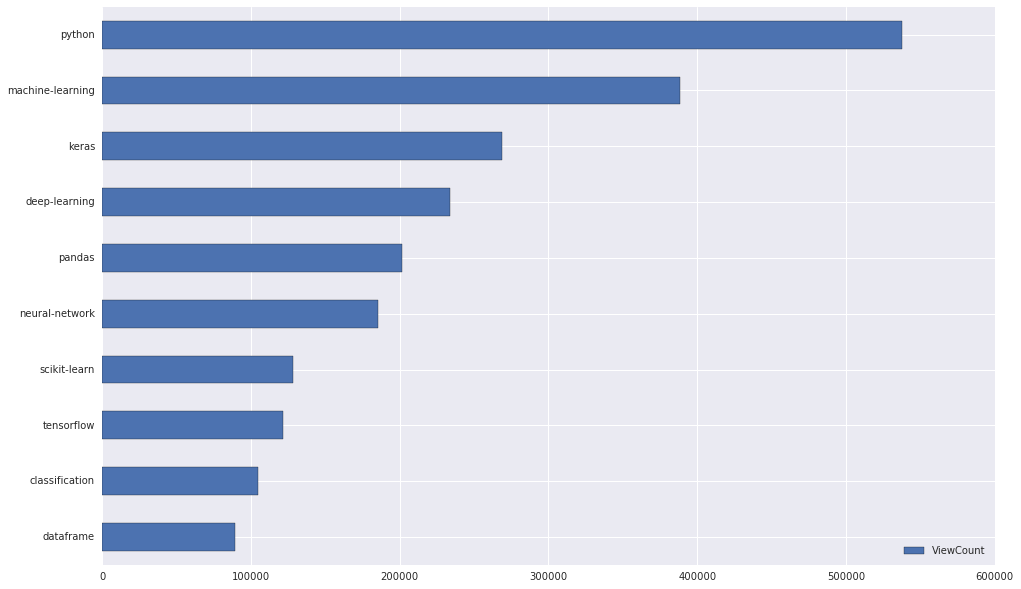

In [13]:
most_viewed.plot(kind="barh", figsize=(16,10))

These may be easier to interpret side by side.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd23af8fb38>],
      dtype=object)

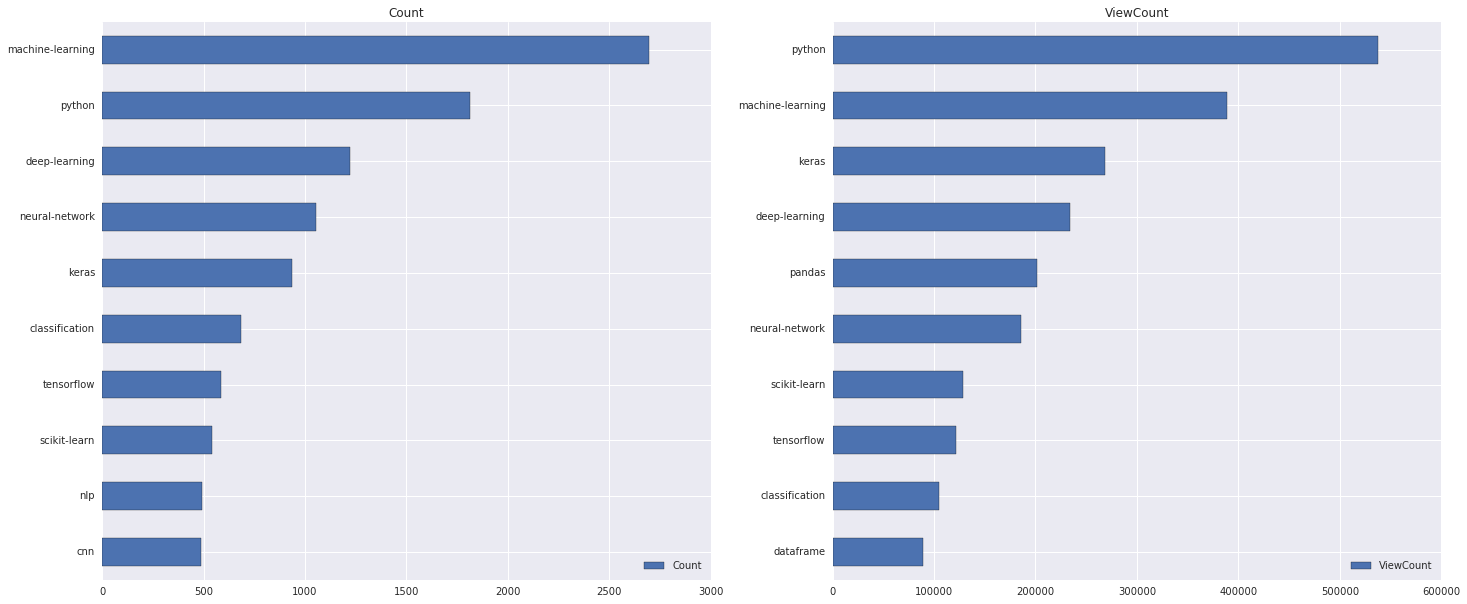

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24,10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

## Relations Between Tags
To see what tags are in `most_used` but not `most_viewed`, we will merge the two dataframes.

In [17]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
print(in_used)

                  Count  ViewCount
cnn                 489        NaN
nlp                 493        NaN
scikit-learn        540   128110.0
tensorflow          584   121369.0
classification      685   104457.0
keras               935   268608.0
neural-network     1055   185367.0
deep-learning      1220   233628.0
python             1814   537585.0
machine-learning   2693   388499.0


We can see two tags, `cnn` and `nlp` which do not occur in `most_viewed`. Now let's see what's true the other way around.

In [19]:
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)
print(in_viewed)

                   Count  ViewCount
dataframe            NaN      89352
classification     685.0     104457
tensorflow         584.0     121369
scikit-learn       540.0     128110
neural-network    1055.0     185367
pandas               NaN     201787
deep-learning     1220.0     233628
keras              935.0     268608
machine-learning  2693.0     388499
python            1814.0     537585


Here we can see that again two tags, `dataframe` and `pandas`, exist in `most_viewed`, but not in `most_used`.

## Enter Domain Knowledge
Below will be a brief explanation of the meanings of 8 of the top 10 popular tags, and whether they are related to other tags.
1. `python` - Use for data science questions related to the programming language Python. Relations: 2, 3, 4, 5, 6, 7, 8
2. `machine-learning` - Machine Learning is a subfield of computer science that draws on elements from algorithmic analysis, computational statistics, mathematics, optimization, etc. It is mainly concerned with the use of data to construct models that have high predictive/forecasting ability. Topics include modeling building, applications, theory, etc. Relations: 1, 3, 4, 5, 6, 7, 8
3. `deep-learning` - a new area of Machine Learning research concerned with the technologies used for learning hierarchical representations of data, mainly done with deep neural networks (i.e. networks with two or more hidden layers), but also with some sort of Probabilistic Graphical Models. Relations: 1, 2, 4, 5
4. `neural-network` - Artificial neural networks (ANN), are composed of 'neurons' - programming constructs that mimic the properties of biological neurons. A set of weighted connections between the neurons allows information to propagate through the network to solve artificial intelligence problems without the network designer having had a model of a real system. Relations: 1, 2
5. `keras` - Keras is a popular, open-source deep learning API for Python built on top of TensorFlow and is useful for fast implementation. Topics include efficient low-level tensor operations, computation of arbitrary gradients, scalable computations, export of graphs, etc. Relations: 1, 2, 3, 6
6. `tensorflow` - TensorFlow is an open source library for machine learning and machine intelligence. TensorFlow uses data flow graphs with tensors flowing along edges. For details, see https://www.tensorflow.org. TensorFlow is released under an Apache 2.0 License. Relations: 1, 2, 5
7. `classification` - An instance of supervised learning that identifies the category or categories which a new instance of dataset belongs. Relations: 1, 2
8. `scikit-learn` - scikit-learn is a popular machine learning package for Python that has simple and efficient tools for predictive data analysis. Topics include classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Relations: 1, 2, 7

Python having the most relations makes sense, as being a programming language, will be useful in most machine learning scenarios, and the rest of the tags either have to do with types of machine learning, or tools which use machine learning, which would mean machine learning, specifically deep learning in this case, is the most popular topic at the moment.

## Just a Fad?
Before solidifying our recommendation of deep learning, we will take a look at a dataframe containing all questions ever asked on DSSE.

In [20]:
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

We will clean the tags the same way as before.

In [23]:
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")

To make sure we can figure out which questions pertain to deep learning, we will create a list of tags related to deep learning:
`["lstm", "cnn", "scikit-learn", "tensorflow", "neural-network", "deep-learning"]`
We will create a function that labels deep learning questions as 1, and all others as 0.

In [24]:
dl_tags = ["lstm", "cnn", "scikit-learn", "tensorflow", "neural-network", "deep-learning"]

def is_deep_learning(tags):
    for tag in tags:
        if tag in dl_tags:
            return 1
        return 0

In [25]:
all_q["IsDL"] = all_q["Tags"].apply(is_deep_learning)

In [26]:
all_q.sample(10)

,Id,CreationDate,Tags,IsDL
10124,50931,2019-04-25 18:08:28,[kernel],0
3132,16076,2017-01-04 20:31:22,"[data-mining, dataset, scraping]",0
2906,56646,2019-07-30 21:43:42,"[neural-network, lstm]",1
14781,31280,2018-05-06 11:20:57,"[machine-learning, bayes-error]",0
5429,26877,2018-01-21 03:53:33,"[python, keras, feature-engineering]",0
9553,41687,2018-11-25 20:31:08,[variance],0
6801,48459,2019-04-02 16:32:16,"[machine-learning, python]",0
20837,35748,2018-07-19 16:58:13,[graphs],0
6374,39953,2018-10-20 06:35:30,"[machine-learning, text-mining, k-means]",0
19627,65118,2019-12-19 10:39:12,"[python, convolution, scipy]",0


It appears our function has worked. To establish a timeframe, we will remove dates from 2020, as we don't have data from the first quarter of 2020.

In [28]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]

Now we will sort questions into quarters to create a manageable time period.

In [30]:
def find_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(find_quarter)

In [31]:
all_q.head()

,Id,CreationDate,Tags,IsDL,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],0,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1


Next we will determine what ratio of questions asked in a quarter pertain to deep learning.

In [32]:
quarterly = all_q.groupby("Quarter").agg({"IsDL": ["sum", "size"]})
quarterly.columns = ["DeepLearningQuestions", "TotalQuestions"]
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"] / quarterly["TotalQuestions"]

quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
13,17Q3,109,714,0.152661
22,19Q4,338,2036,0.166012
15,18Q1,186,1221,0.152334
0,14Q2,3,157,0.019108
12,17Q2,102,647,0.157651


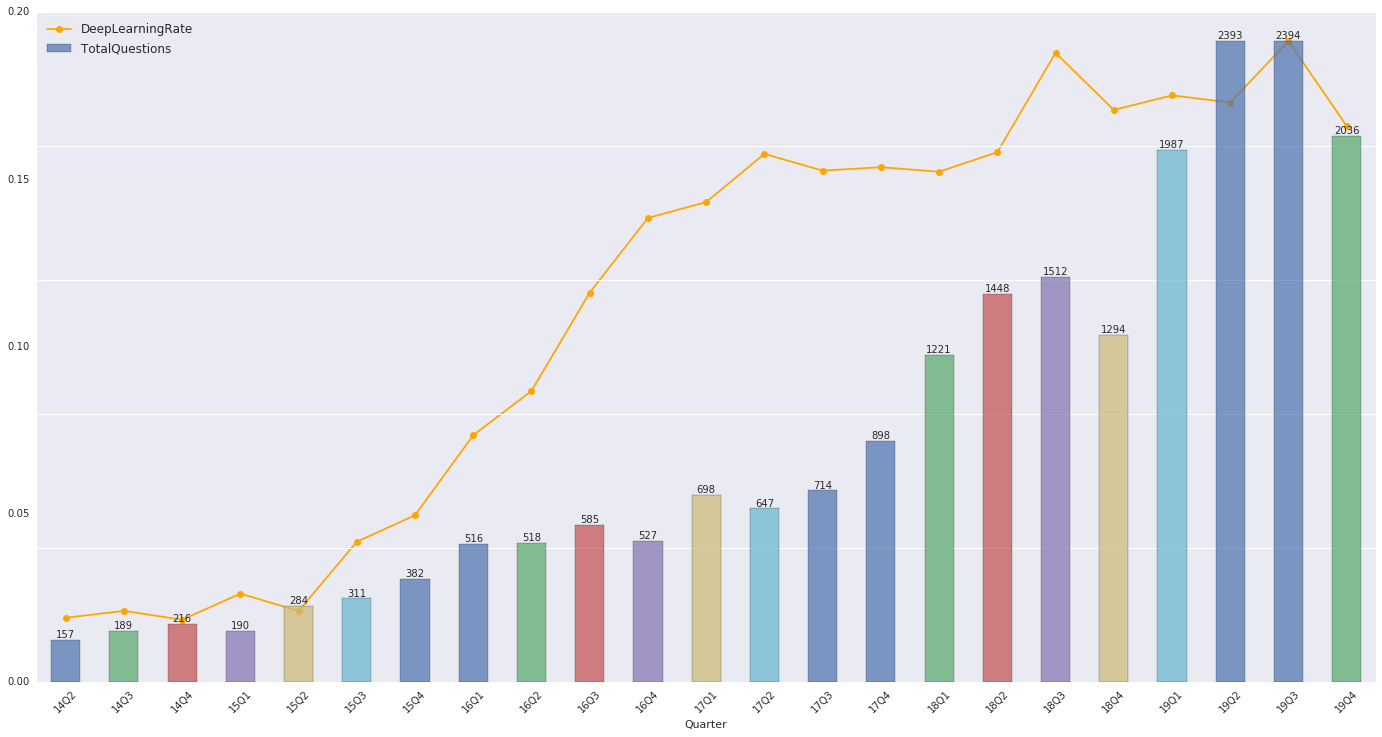

In [33]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )
ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                    kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)
for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1+handles2,
          labels=labels1+labels2,
          loc="upper left", prop={"size":12})
for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

While the rate of deep learning questions has seemingly plateaued, it has not begun to decline, as the last quarter's decline in deep learning questions corresponds to an overall reduction in questiones asked